# ML Project on Heart Disease Prediction



#### Objective:
To predict the occurrence of heart disease based on health parameters. This is a binary classification problem.

**Project Outline**

1. Data Acquisition

2. Data Preprocessing  - Handled missing values and standardized features.

3. Exploratory Data Analysis (EDA) - Visualized feature distributions and analyzed correlations.

4. Model Training - Trained multiple models: Logistic Regression, Decision Tree, Random Forest, SVM, KNN, and XGBoost.

5. Hyperparameter Tuning - Used GridSearchCV for optimal hyperparameters.

6. Model Evaluation - Assessed models using accuracy, classification reports, and confusion matrices and compared model accuracies visually.


In [2]:
# Importing required libraries
import seaborn as sns
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex

In [3]:
# Load the dataset
heart_df = pd.read_csv('heart.csv')

## About the dataset

Dataset is available on Kaggle and can be accessed through following link:

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

#Information about this dataset:

Age : Age of the patient

Sex : Sex of the patient

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (numeric, measured in millimeters)
*  Measures the relative change in the ST segment of the ECG during exercise compared to rest. This is used to assess the severity of coronary artery disease.

slp: Slope of the peak exercise ST segment (categorical)

*  Indicates the slope of the ST segment during peak exercise. It typically has the following values:
      *  0: Upsloping
      *  1: Flat
      *  2: Downsloping

caa: number of major vessels (0-3)

cp : Chest Pain type

*   Value 1: typical angina
*   Value 2: atypical angina
*   Value 3: non-anginal pain
*   Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

*   Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

thall: Thalassemia (categorical)
*   Represents a blood disorder called thalassemia. The typical values might be:
      *  0: No information or test result available
      *  1: Normal
      *  2: Fixed defect (no blood flow in some part of the heart)
      *  3: Reversible defect (a blood flow is observed but it can be fixed)


output: 0= less chance of heart attack 1= more chance of heart attack



## Basic Data Exploration

In [4]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Exploratary Data Analysis and Data Preprocessing

*   Descriptive Statistics: Generate summary statistics of the dataset.
*   Identifying and handling missing values.
*   Identifying and handling duplicated values.
*   Visualizations: Create visualizations to understand feature distributions, correlations, and relationships with the target variable.

In [6]:
# Checking the data shape
heart_df.shape

(303, 14)

In [7]:
# Checking the number of distinct entries in each column
print(heart_df.nunique())

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Note that highest Cholestrol level (chol) recorded is 564 and lowest is 126. The Resting Blood Pressure (restecg) of individuals vary between 94 to 200.

In [10]:
# Checking for missing values
print(heart_df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


There are no missing values in the column so we are good to go.

In [11]:
# Chceking for duplicates
heart_df[heart_df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
#This is to look at what all unique values have.
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col:
    print('{} :{} ' . format(col.upper(),heart_df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


In [13]:
ex.pie(heart_df,names='output',title='Proportion of different classes')

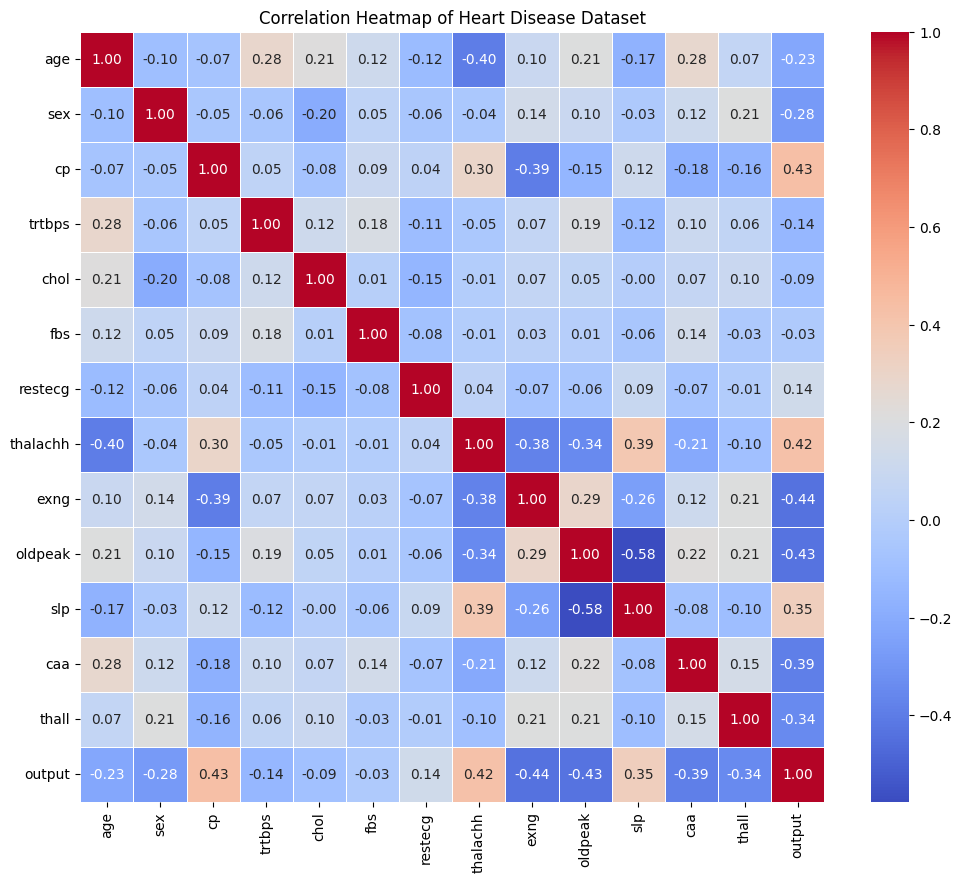

In [14]:
# Correlation Matrix
corr_matrix=heart_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Heart Disease Dataset')

# Show the plot
plt.show()

##Plotting the distribution of each feature

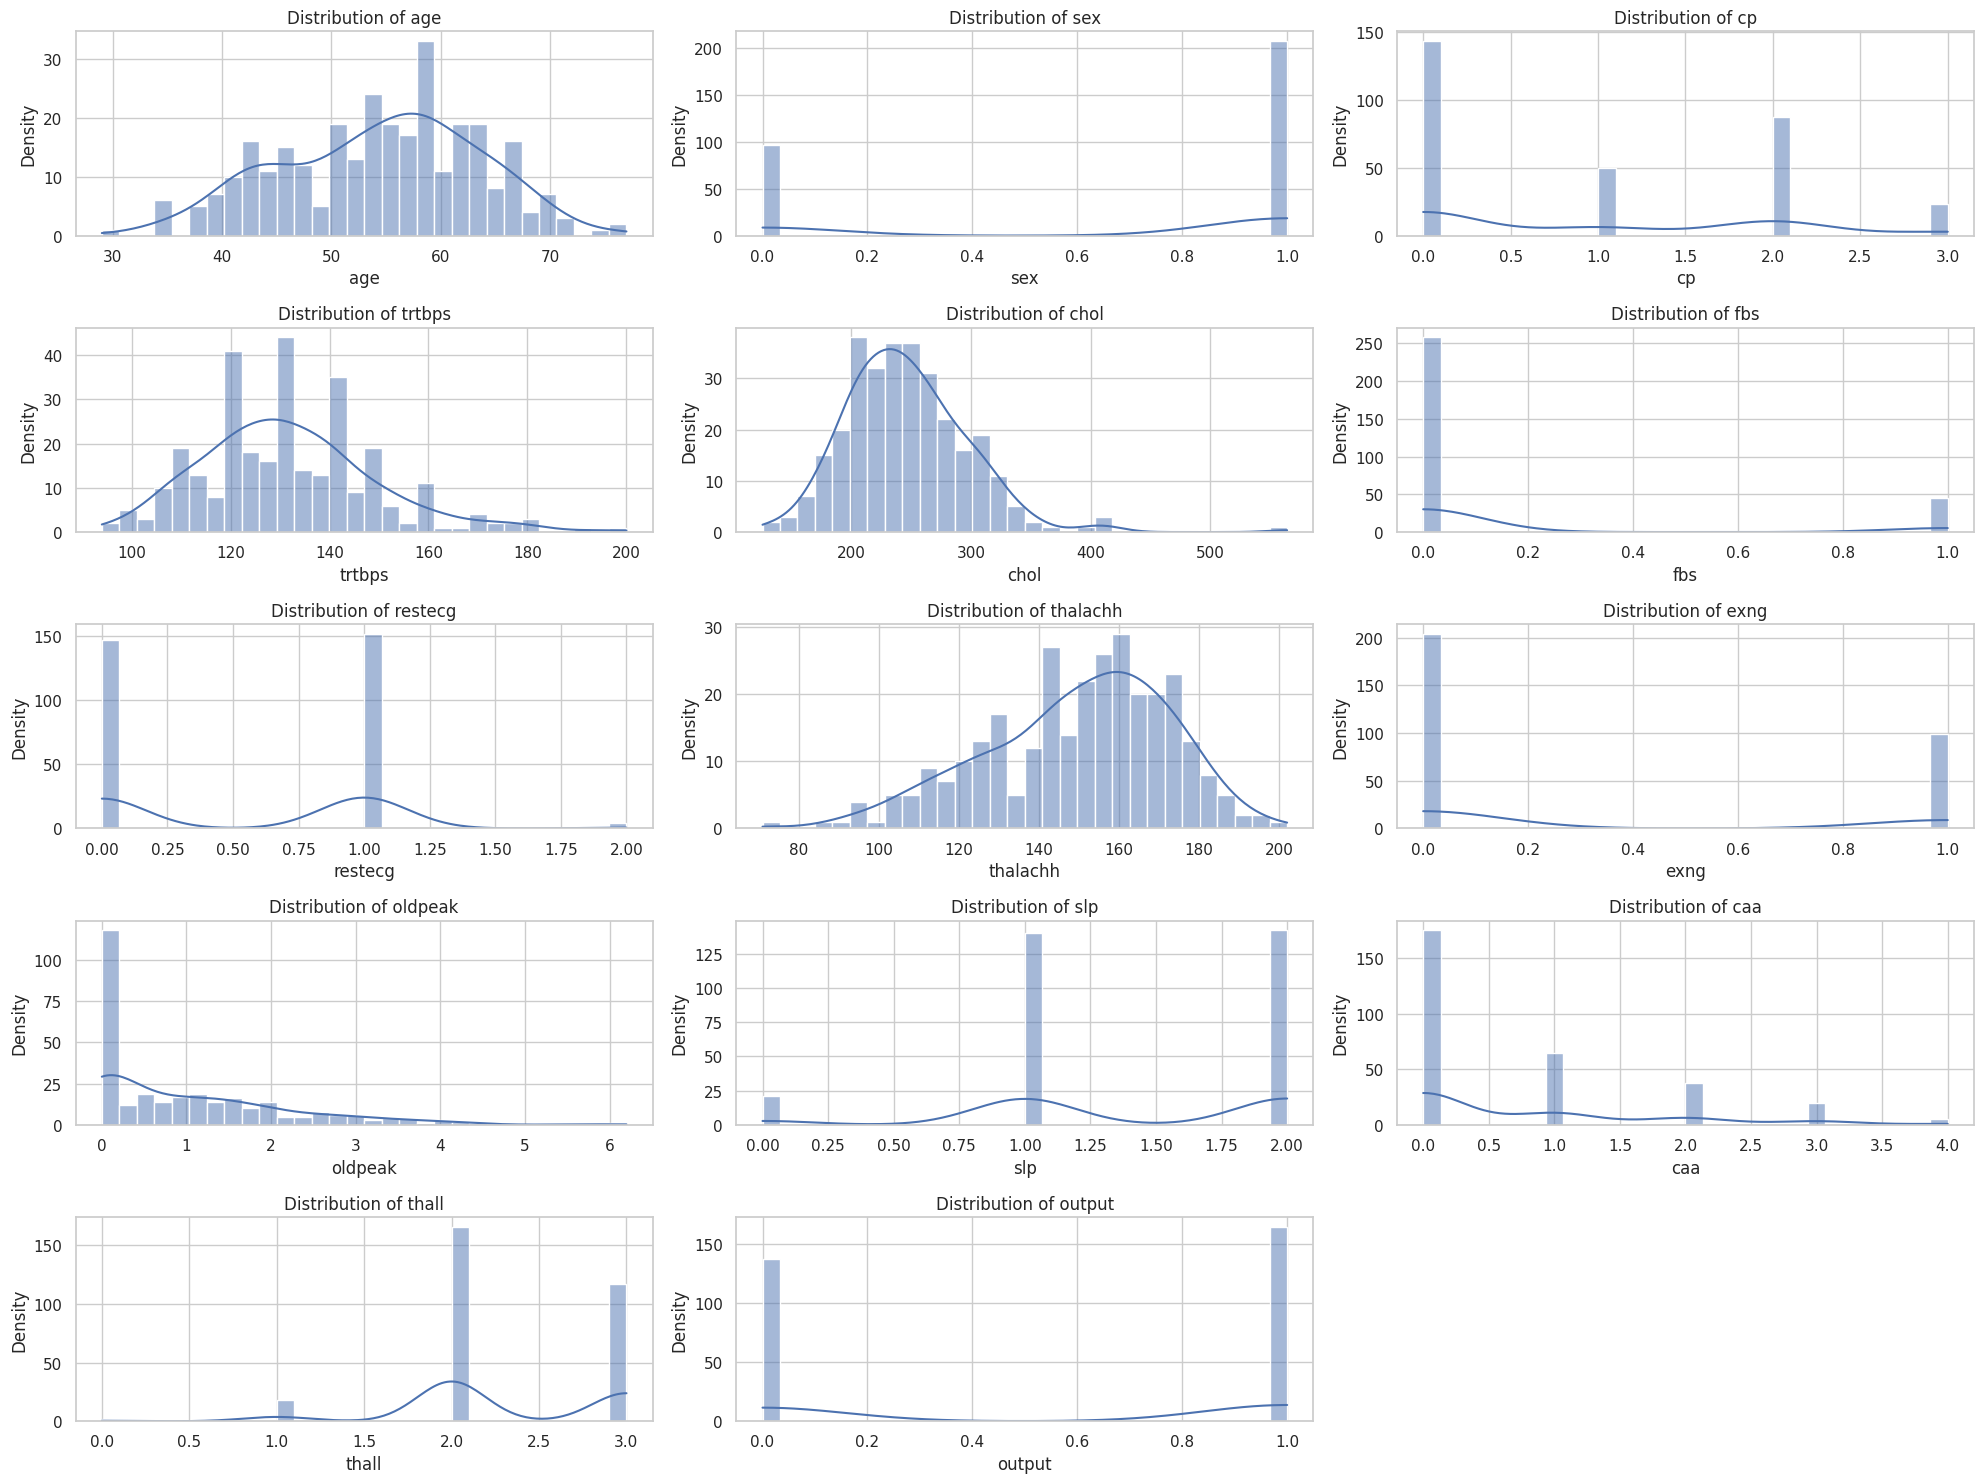

In [15]:
# Plotting the distribution of each feature

features = heart_df.columns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot distribution for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(len(features) // 3 + 1, 3, i + 1)
    sns.histplot(heart_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

<Axes: xlabel='trtbps', ylabel='Count'>

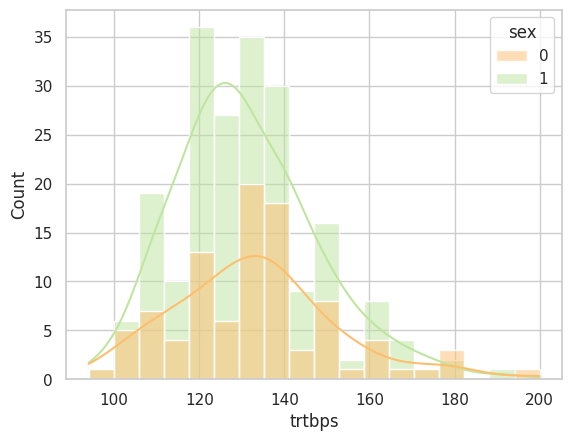

In [16]:
# create a histplot trestbops column to analyse with sex column
sns.histplot(heart_df, x='trtbps', kde=True, palette = "Spectral", hue ='sex')

# Model Training and Evaluation:

*  Train-Test Split: Split the data into training and testing sets using stratified sampling.
*  Model Selection: Train multiple models, including Logistic Regression, Decision Tree, Random Forest, SVM, KNN, and XGBoost.
*  Model Evaluation: Evaluate models using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
*  Model Comparison: Comparing the performaces of different modesl to choose best one.
*  Hyperparameter Tuning: Use GridSearchCV for hyperparameter optimization.
*  Model Evaluation of Hyperparameter-tuned model: Evaluate models using metrics like accuracy, precision, recall, F1-score, and confusion matrix.

In [17]:
# Splitting the data into features and output
X = heart_df.drop(columns='output')
y = heart_df['output']

In [18]:
# Loading libraries for model building
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Standard scaler to standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## List of Machine Learning models used here:
  
1.   Logistic Regression
2.   Decision Tree
3.   Random Forest
4.   Support Vector Machine
5.   K-Nearest Neighbors
6.   XGBoost

In [20]:
# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost Classifier": XGBClassifier()
}

In [21]:
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return accuracy

In [22]:
# Dictionary to store the accuracy of each model
accuracy_dict = {}

# Training and evaluating each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    accuracy = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    accuracy_dict[model_name] = accuracy
    print("\n")

Training Logistic Regression...
Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[25  4]
 [ 5 27]]


Training Decision Tree...
Accuracy: 0.7868852459016393
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Confusion Matrix:
[[26  3]
 [10 22]]


Training Random Forest...
Accuracy: 0.8524590163934426
Classification Report:
              precision    r

## Model Comparison and Selection
*  Compare Models: Compare the performance of all trained models based on evaluation metrics.
*  Select Best Model: Choose the model with the best performance.

Now, we make a bar plot which visualizes the accuracy of the different models.

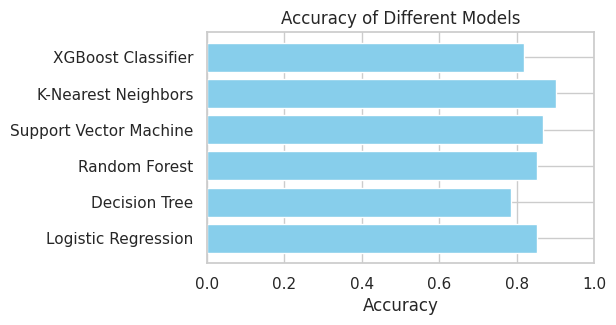

In [23]:
# Create a bar plot for accuracies
plt.figure(figsize=(5,3))
plt.barh(list(accuracy_dict.keys()), list(accuracy_dict.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.show()

All of the models are performing really well with around 80% accuracy. Best performing model for the given dataset is K-Nearest Neighbors with an accuracy of 90%.

## Hyper parameter tuning of KNN

To further improve performance of the model.

Using stratified sampling to maintain the same class distribution.

In [24]:
# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(15,25)),  # broader range for n_neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best cross-validation score: 0.8389455782312926


In [25]:
# Train the best KNN model
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Evaluate the best KNN model
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test set accuracy: 0.9016393442622951
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
[[26  3]
 [ 3 29]]


False negative in this context refers to the patients who actually have a heart disease but the model predicted that they don't have a heart disease. We can observe that in this particular situtation reducing number of False Negative should have been our focus and we are able to do that.

## Conclusion:

After doing the hyperparameter tuning, the overall accuracy of the K-Nearest Neighbours model is still at 90%, but on the positive side, we are able to decrease False Negatives in the Confusion matrix.



## Save the Best Trained Model
Use Pickle to serialize and save the trained model to a file:

In [26]:
# Save the trained model to a file using Pickle
import pickle
pickle.dump(best_knn, open('knn_model.pkl', 'wb'))